# ggplot 510 - use polar coordinates with coord_polar()

We use plotnine (a ggplot2 clone for Python).  
Plotnine does not have a coord_polar() yet.  
The demo's below are made in R using ggplot2.

The used examples are adaptations of the [tidyverse](http://ggplot2.tidyverse.org/reference/coord_polar.html) ggplot coord_polar() documentation.

# NOTE: code cells contain R-code not Python

# 0 - setup the notebook

In [1]:
library(ggplot2)
options(repr.plot.width  = 5, repr.plot.height = 4) # limit the size of the plots

## 1 - get the data 

In [2]:
cars <- read.csv('./dat/mtcars.csv')
#str(cars)
head(cars)

model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


# 2 - show a barchart in polar coordinates

**NOTE**  
cyl -number of cylinders- is a numeric variable with values 4, 6 and 8.  
fill= requires a categorical -nominal or ordinal- variable.  
in R a categorical variable is called a factor.  
factor(cyl) transforms cyl into a factor (i.e. makes it categorical)

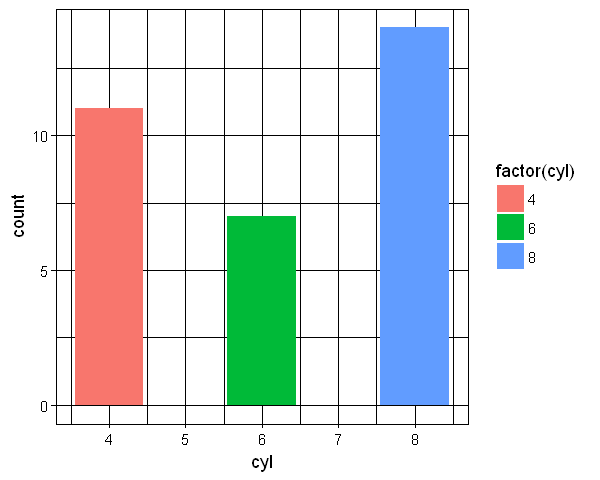

In [3]:
ggplot(data=cars, mapping=aes(x=cyl, fill=factor(cyl)) ) +
    geom_bar() +
    theme_linedraw()

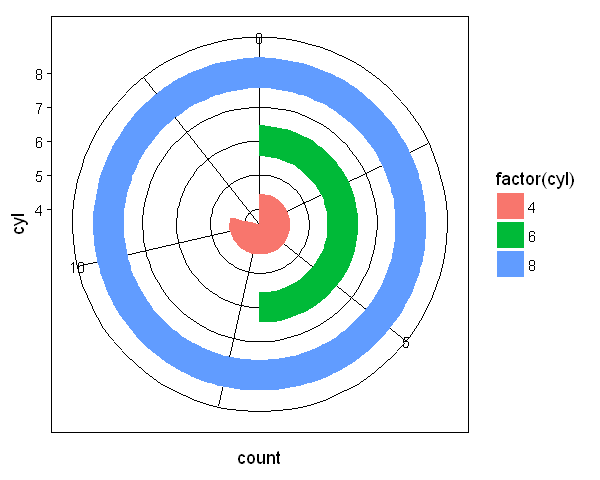

In [4]:
# plot this barchart in polar coordinates.
ggplot(data=cars, mapping=aes(x=cyl, fill=factor(cyl)) ) +
    geom_bar() +
    coord_polar(theta="y") +
    theme_linedraw()

Lets see what happened.  
Lets start with refreshing our polar coordinate knowledge [Wikipedia](https://en.wikipedia.org/wiki/Polar_coordinate_system).  

A point in a polar plot can be found by two coordinates: the radius and the theta
- theta : the angle with the line from the center to the "12 o'clock" position.
- radius: start at the center of the plot and draw a line with length r (note r >= 0) in the theta direction.

In our example:  
The theta was the y position from the barplot (i.e. the count).   
The counts were: 12 times cyl=4, 7 times cyl=6 and 14 times cyl=8  
When you go clockwise around the outer circle you see the numbers 0, 5, 10 and 0 again.  
- the pink arc representing the cyl=4 count, goes to about 10 o'clock, that is a count of 12.
- the green arc representing the cyl=6 count, goes to about 6 o'clock , that is a count of 7.
- the blue arc representing the cyl=8 count, goes to 12 o'clock, that is a count of 14.

The number of cylinders (4,6,8) was mapped onto the radius. (see the guides in the upper left of the figure).  
- the smallest circle in the middle represents the number 4.
- the green segment goes two circles outward represents 4+2 = 6
- the blue segment is again two circles further away hence represents 6+2 = 8

The fact that the inner circle represents the 4 (not 1 as one would expect) makes the plot hard to read.  
This can be fixed by setting the xlim from 0 to 10

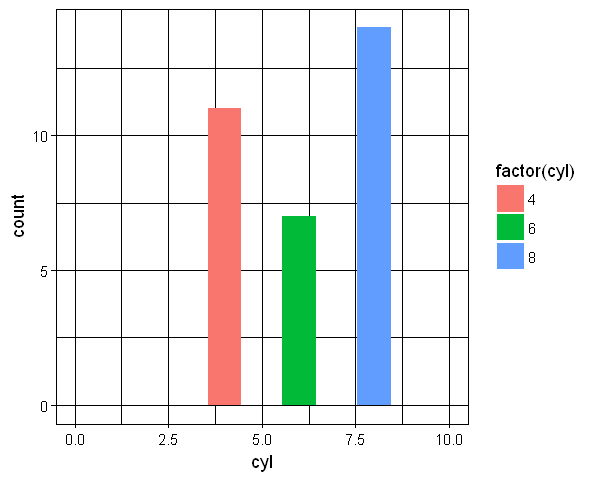

In [5]:
ggplot(data=cars, mapping=aes(x=cyl, fill=factor(cyl)) ) +
    geom_bar() +
    xlim(0,10) +
    theme_linedraw()

When we plot this lopsided barplot in polar coordinates the result is more readable.

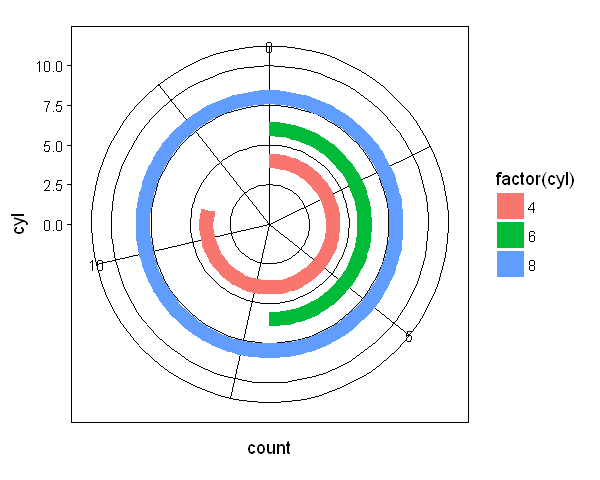

In [6]:
ggplot(data=cars, mapping=aes(x=cyl, fill=factor(cyl)) ) +
    geom_bar() +
    coord_polar(theta="y") +
    xlim(0,10) +
    theme_linedraw()

Lets see what happens when we use theta="x"  
NOTE the xlim is set from 0 to 12 to promote readability.

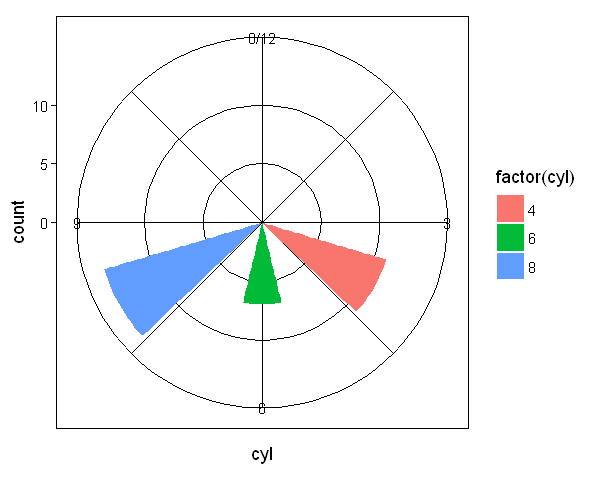

In [16]:
ggplot(data=cars, mapping=aes(x=cyl, fill=factor(cyl)) ) +
    geom_bar() +
    xlim(0,12) +
    coord_polar(theta="x") +
    theme_linedraw()

Now we can read:  
- pink: angle at 4 o'clock represents 4 cylinders, radius represents a count of 12
- green: angle at 6 o'clock represents 6 cylinders, radius represents a count of 7
- blue: angle at 8 o'clock represents 8 cylinders, radius represents a count of 14

#### Conclusion:
- the original barchart is far easier to read than our polar plots.
- do not use polar plots when a barchart can be used. 
- a pie chart is a type of polar plot, so do not use this when a barchart is possible
- hence never use pie-charts?

## 3 - How to make a pie-chart anyway (guilty pleasures)

You should not, but it is possible to make a pie chart.  
The trick is to start with the right barplot.  
Here is how you do it.

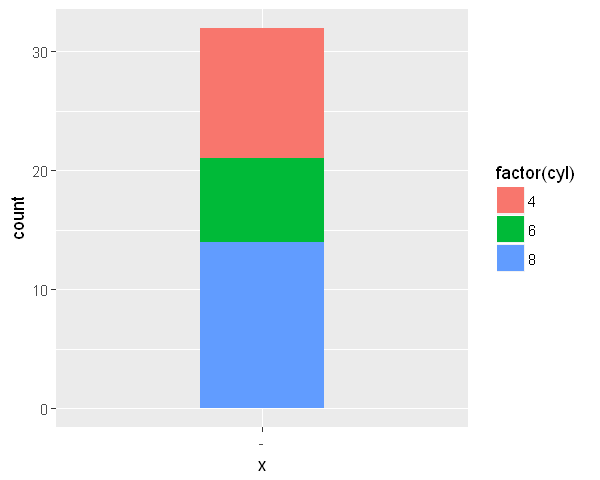

In [9]:
ggplot(data=cars, mapping=aes(x = "-", fill = factor(cyl))) +
    geom_bar(width=0.3) 

The trick is that you should use one bar, and stack the cylinder counts inside this bar by using fill.  
The x="-" defines one bar with the label "-" 

Now simply display this bar in polar coordinates.

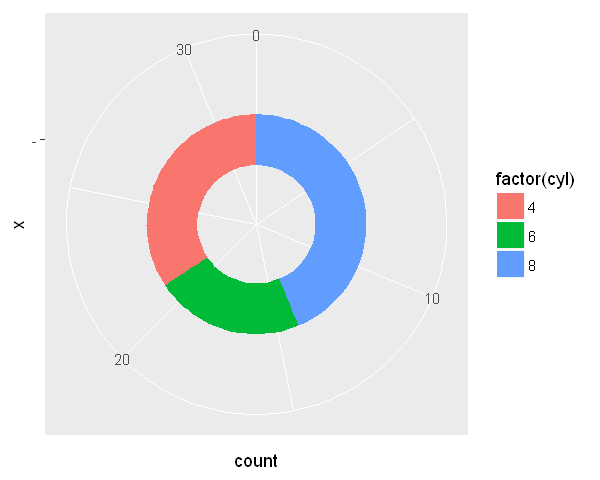

In [10]:
ggplot(data=cars, mapping=aes(x = "-", fill = factor(cyl))) +
    geom_bar(width=0.3) +
    coord_polar(theta="y")

Set the width=1 to get rid of the hole in the middle.

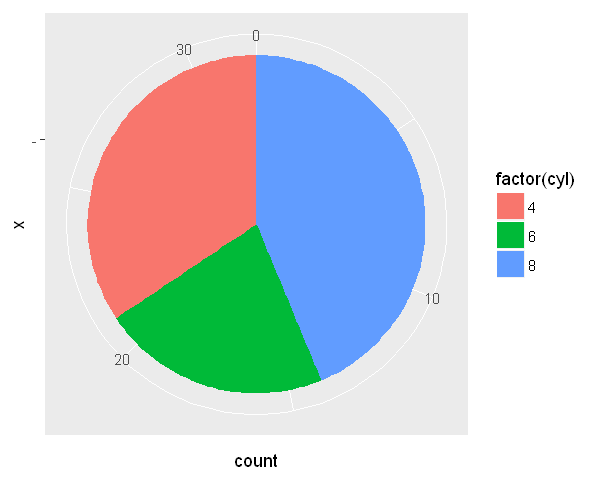

In [11]:
ggplot(data=cars, mapping=aes(x = "-", fill = factor(cyl))) +
    geom_bar(width=1) +
    coord_polar(theta="y")

This is a simple pie-chart, but even this is hard to read.  
Try reading how many cars are blue, green and pink.  
Now try the same using the barplot below.

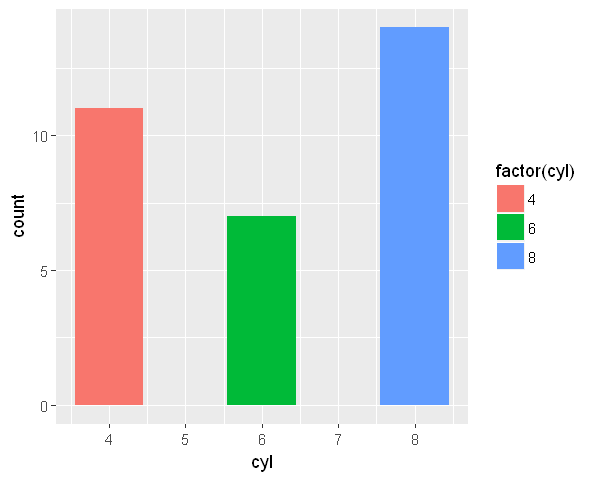

In [12]:
ggplot(data=cars, mapping=aes(x=cyl, fill=factor(cyl))) +
    geom_bar()

# 4 - playtime

Just to check your polar coordinates interpretation skills, try to understand what is going on below. 

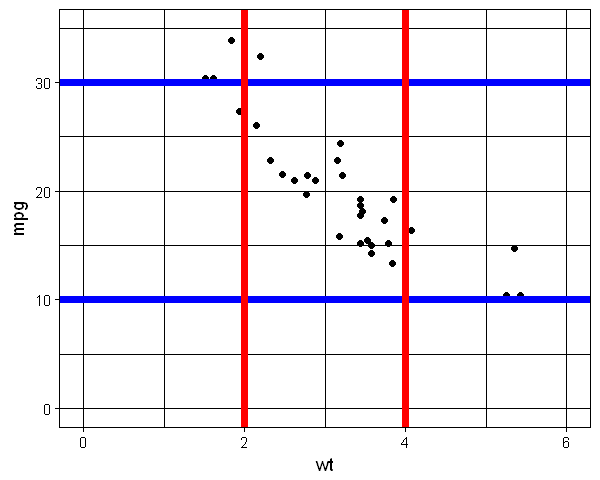

In [13]:
ggplot(data=cars, mapping=aes(x=wt, y=mpg)) +
    geom_point() +
    geom_hline(yintercept=c(10, 30), color='blue', size=2) +
    geom_vline(xintercept=c(2,4), color ='red', size=2) +
    xlim(c(0,6)) + ylim(c(0,35)) +
    theme_linedraw()

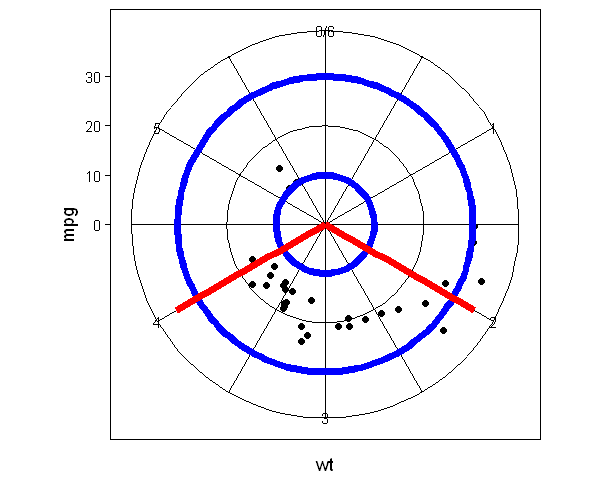

In [14]:
ggplot(data=cars, mapping=aes(x=wt, y=mpg)) +
    geom_point() +
    geom_hline(yintercept=c(10, 30), color='blue', size=2) +
    geom_vline(xintercept=c(2,4), color ='red', size=2) +
    xlim(c(0,6)) + ylim(c(0,35)) +
    coord_polar(theta="x") + 
    theme_linedraw()

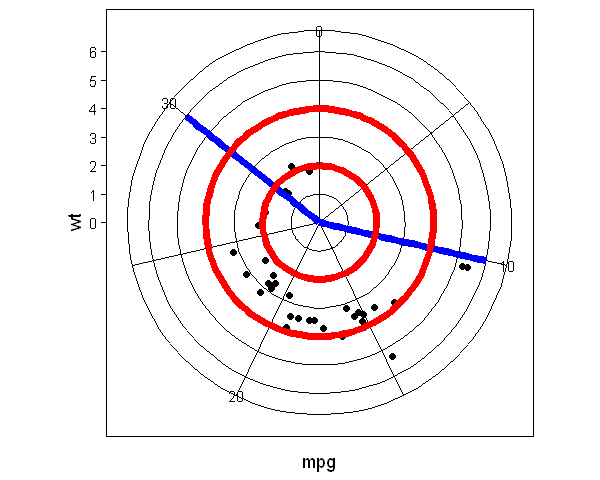

In [15]:
ggplot(data=cars, mapping=aes(x=wt, y=mpg)) +
    geom_point() +
    geom_hline(yintercept=c(10, 30), color='blue', size=2) +
    geom_vline(xintercept=c(2,4), color ='red', size=2) +
    xlim(c(0,6)) + ylim(c(0,35)) +
    coord_polar(theta="y") +
    theme_linedraw()